In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
train_data=pd.read_csv("loan_train.csv")
test_data=pd.read_csv("loan_test.csv")
data=pd.concat([train_data,test_data],axis=0)



In [15]:
data.head()


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              957 non-null    object 
 1   Married             978 non-null    object 
 2   Dependents          956 non-null    object 
 3   Education           981 non-null    object 
 4   Self_Employed       926 non-null    object 
 5   Applicant_Income    981 non-null    int64  
 6   Coapplicant_Income  981 non-null    float64
 7   Loan_Amount         981 non-null    int64  
 8   Term                961 non-null    float64
 9   Credit_History      902 non-null    float64
 10  Area                981 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 99.6+ KB


In [17]:
data.isnull().sum()

Gender                 24
Married                 3
Dependents             25
Education               0
Self_Employed          55
Applicant_Income        0
Coapplicant_Income      0
Loan_Amount             0
Term                   20
Credit_History         79
Area                    0
Status                367
dtype: int64

In [19]:
df=data

In [27]:
gender_counts = df['Gender'].value_counts()

most_common_gender = gender_counts.idxmax()


df['Gender'].fillna(most_common_gender, inplace=True)
  

In [28]:
marriage_counts = df['Married'].value_counts()

mcnt = marriage_counts.idxmax



df['Married'].fillna(mcnt, inplace=True)

In [33]:
dep_counts = df["Dependents"].value_counts()

dcnt = dep_counts.idxmax()

df['Dependents'].fillna(dcnt, inplace=True)

In [34]:
dep_counts = df['Self_Employed'].value_counts()

dcnt = dep_counts.idxmax()


df['Self_Employed'].fillna(dcnt, inplace=True)

In [24]:
dep_counts = df['Status'].value_counts()

dcnt = dep_counts.idxmax()


df['Status'].fillna(dcnt, inplace=True)

In [37]:
df["Term"].fillna(df["Term"].mean(),inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mean(),inplace=True)

In [38]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

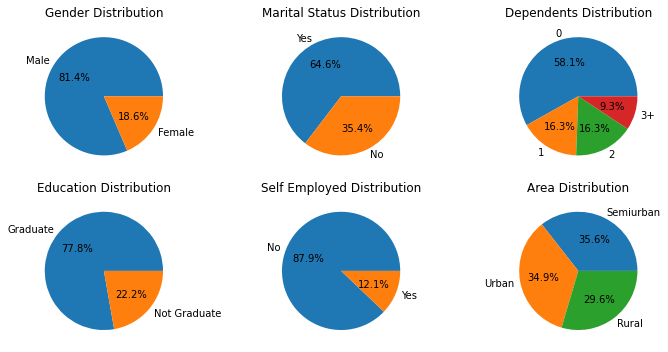

In [45]:
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(10,5))
gen_cnt = df["Gender"].value_counts()
marn_cnt = df["Married"].value_counts()
dep_cnt = df["Dependents"].value_counts()
edu_cnt = df["Education"].value_counts()
self_cnt = df["Self_Employed"].value_counts()
Area_cnt = df["Area"].value_counts()
status_cnt = df["Status"].value_counts()

ax[0, 0].pie(gen_cnt, labels=gen_cnt.index, autopct="%1.1f%%")
ax[0, 0].set_title("Gender Distribution")

ax[0, 1].pie(marn_cnt, labels=marn_cnt.index, autopct="%1.1f%%")
ax[0, 1].set_title("Marital Status Distribution")

ax[0, 2].pie(dep_cnt, labels=dep_cnt.index, autopct="%1.1f%%")
ax[0, 2].set_title("Dependents Distribution")

ax[1, 0].pie(edu_cnt, labels=edu_cnt.index, autopct="%1.1f%%")
ax[1, 0].set_title("Education Distribution")

ax[1, 1].pie(self_cnt, labels=self_cnt.index, autopct="%1.1f%%")
ax[1, 1].set_title("Self Employed Distribution")

ax[1, 2].pie(Area_cnt, labels=Area_cnt.index, autopct="%1.1f%%")
ax[1, 2].set_title("Area Distribution")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
plt.show()

In [47]:

X=df.drop("Status",axis=1)
y=df["Status"]

In [78]:
df["Gender"]=df["Gender"].replace({"Male":1,"Female":0})
df["Married"]=df["Married"].replace({"Yes":1.0,"No":0.0})

In [79]:
df["Self_Employed"]=df["Self_Employed"].replace({"Yes":1.0,"No":0.0})
df["Education"]=df["Education"].replace({"Graduate":1.0,"Not Graduate":0.0})
df["Status"]=df["Status"].replace({"Y":1.0,"N":0.0})
df["Area"]=df["Area"].replace({"Urban":1.0,"Rural":0.0,"Semiurban":2.0})

df["Dependents"] = pd.to_numeric(df["Dependents"], errors="coerce")
df["Dependents"].fillna(0,inplace=True)

In [80]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0.000000,1,0,584900,0.0,15000000,360.0,1.0,1,1
1,1,1,1.000000,1,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,1,0.000000,1,1,300000,0.0,6600000,360.0,1.0,1,1
3,1,1,0.000000,0,0,258300,235800.0,12000000,360.0,1.0,1,1
4,1,0,0.000000,1,0,600000,0.0,14100000,360.0,1.0,1,1
5,1,1,2.000000,1,1,541700,419600.0,26700000,360.0,1.0,1,1
6,1,1,0.000000,0,0,233300,151600.0,9500000,360.0,1.0,1,1
7,1,1,0.539326,1,0,303600,250400.0,15800000,360.0,0.0,2,0
8,1,1,2.000000,1,0,400600,152600.0,16800000,360.0,1.0,1,1
9,1,1,1.000000,1,0,1284100,1096800.0,34900000,360.0,1.0,2,0


In [81]:

X=df.drop("Status",axis=1)
y=df["Status"]

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
    
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

array([0.95, 0.47, 0.88, 0.95, 0.58, 0.85, 0.81, 0.47, 0.93, 0.58, 0.95,
       0.92, 0.79, 0.83, 0.24, 0.76, 0.82, 1.  , 0.91, 0.71, 0.65, 0.9 ,
       0.93, 0.95, 0.98, 0.54, 1.  , 0.94, 0.99, 0.68, 0.23, 0.83, 0.94,
       0.87, 0.6 , 0.7 , 0.82, 0.76, 0.84, 0.55, 0.68, 0.72, 0.92, 0.98,
       0.92, 0.82, 0.92, 0.71, 0.96, 0.93, 0.89, 0.84, 0.98, 0.96, 1.  ,
       0.96, 0.99, 0.82, 0.93, 0.47, 0.95, 1.  , 0.88, 0.97, 0.95, 0.89,
       0.93, 0.86, 0.96, 0.71, 0.96, 0.91, 0.91, 0.81, 0.33, 0.3 , 0.24,
       0.92, 0.95, 0.59, 0.88, 1.  , 0.92, 0.97, 0.95, 0.5 , 0.95, 0.99,
       0.8 , 0.98, 1.  , 0.77, 0.95, 0.85, 0.98, 0.9 , 0.96, 0.98, 0.98,
       0.99, 0.96, 0.24, 0.82, 0.94, 0.92, 0.96, 0.96, 0.94, 0.99, 0.87,
       0.46, 0.99, 0.73, 0.97, 0.68, 0.54, 0.57, 0.93, 0.97, 0.97, 0.93,
       0.83, 0.8 , 0.95, 0.94, 0.86, 0.6 , 0.82, 0.87, 0.96, 0.98, 0.92,
       0.95, 0.93, 0.99, 0.86, 0.39, 0.73, 0.89, 0.7 , 0.99, 0.87, 0.97,
       0.94, 0.53, 0.98, 0.87, 0.33, 0.73, 0.99, 0.